Not explored here - is it truly neighborhoods, or is it attractions that drive price?

In [94]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#### Load Listings info

In [95]:
pdx=pd.read_csv('pdx_cleaned.csv')

In [96]:
pdx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3468 non-null   int64  
 1   listing_url                                   3468 non-null   object 
 2   scrape_id                                     3468 non-null   int64  
 3   last_scraped                                  3468 non-null   object 
 4   source                                        3468 non-null   object 
 5   name                                          3468 non-null   object 
 6   description                                   0 non-null      float64
 7   nearby_attractions                            3468 non-null   object 
 8   picture_url                                   3468 non-null   object 
 9   host_id                                       3468 non-null   i

In [97]:
pdx.shape

(3468, 74)

Shape of loaded dataset matches shape of dataset when I left it with Data Wrangling - hooray no extra index columns!

#### Load Neighborhood Info

In [98]:
nb_summ = pd.read_csv('neighborhood_summary.csv')

In [99]:
nb_summ.head()

,neighborhood,NB_listings_count,NB_price_mean,NB_review_location_mean,NB_review_value_mean,NB_avail_30_mean,NB_avail_60_mean,NB_avail_90_mean,NB_avail_365_mean,NB_min_nights_low,NB_min_nights_high,NB_max_nights_low,NB_max_nights_high,NB_total_reviews,NB_review_rating_mean,NB_review_accuracy_mean,NB_review_cleanliness_mean,NB_review_checkin_mean,NB_review_communication_mean
0,Alameda,14,138.846154,4.95000,4.836667,15.071429,31.071429,46.428571,130.285714,1,31,21,1125,1203,4.900000,4.935833,4.888333,4.953333,4.945833
1,Arbor Lodge,55,96.739130,4.84283,4.808491,12.927273,29.545455,47.727273,168.800000,1,31,5,1125,5748,4.873396,4.901887,4.871321,4.956226,4.947736
2,Ardenwald-Johnson Creek,2,116.000000,4.77000,4.880000,27.000000,57.000000,86.000000,86.000000,4,4,1125,1125,129,4.825000,4.910000,4.780000,4.970000,5.000000
3,Argay,3,38.500000,4.79000,4.853333,9.666667,29.666667,49.666667,171.000000,1,6,45,1125,94,4.923333,4.920000,4.836667,4.970000,4.963333
4,Arlington Heights,5,103.000000,4.96000,4.894000,9.600000,21.800000,33.600000,120.000000,1,28,28,1125,1272,4.954000,4.942000,4.966000,4.962000,4.942000


In [100]:
nb_summ.describe()

,NB_listings_count,NB_price_mean,NB_review_location_mean,NB_review_value_mean,NB_avail_30_mean,NB_avail_60_mean,NB_avail_90_mean,NB_avail_365_mean,NB_min_nights_low,NB_min_nights_high,NB_max_nights_low,NB_max_nights_high,NB_total_reviews,NB_review_rating_mean,NB_review_accuracy_mean,NB_review_cleanliness_mean,NB_review_checkin_mean,NB_review_communication_mean
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,40.489130,136.697753,4.839173,4.823742,13.181508,30.879630,49.728703,161.089048,1.445652,44.184783,72.358696,2.334333e+07,4602.923913,4.883184,4.901883,4.871830,4.933970,4.935541
std,43.413548,91.646505,0.110304,0.071612,3.950798,7.666266,11.269829,42.972689,3.046757,54.129866,238.776993,2.238905e+08,6117.839325,0.061308,0.057766,0.067927,0.056345,0.046465
min,2.000000,38.500000,4.395000,4.582000,0.000000,8.000000,23.000000,68.000000,1.000000,2.000000,1.000000,1.125000e+03,23.000000,4.572917,4.695000,4.610000,4.711250,4.670833
25%,7.750000,102.051471,4.791875,4.799500,10.952381,26.485340,43.548214,135.627837,1.000000,30.000000,5.000000,1.125000e+03,705.750000,4.851755,4.882402,4.839250,4.929900,4.921620
50%,26.500000,116.166667,4.867911,4.835855,12.736800,29.475000,47.627701,152.870690,1.000000,31.000000,7.000000,1.125000e+03,2296.500000,4.898962,4.919583,4.890458,4.952115,4.947868
75%,61.000000,135.465909,4.913355,4.864437,15.017857,33.409380,53.041667,173.409375,1.000000,31.000000,25.500000,1.125000e+03,5459.250000,4.919357,4.934137,4.904267,4.962200,4.963333
max,205.000000,747.592308,4.977500,4.980000,27.000000,57.000000,86.000000,295.233083,30.000000,366.000000,1125.000000,2.147484e+09,31258.000000,4.995000,4.995000,4.995000,4.997500,5.000000


In [101]:
nb_summ = nb_summ.set_index('neighborhood')

In [102]:
nb_summ.NB_listings_count.sort_values(ascending=False).head()

neighborhood
Richmond              205
Northwest District    185
Buckman               183
Concordia             135
Portland Downtown     133
Name: NB_listings_count, dtype: int64

In [103]:
nb_summ.NB_price_mean.sort_values(ascending=False).head()

neighborhood
Portland Downtown    747.592308
Buckman              583.759777
Bridgeton            298.000000
Forest Park          288.833333
Irvington            256.764706
Name: NB_price_mean, dtype: float64

In [104]:
nb_summ.NB_review_location_mean.sort_values(ascending=False).head()

neighborhood
Marshall Park        4.97750
Maplewood            4.96000
Arlington Heights    4.96000
Eastmoreland         4.95125
Alameda              4.95000
Name: NB_review_location_mean, dtype: float64

In [105]:
nb_summ.NB_review_value_mean.sort_values(ascending=False).head()

neighborhood
Glenfair         4.980000
Marshall Park    4.967500
Maplewood        4.961000
East Columbia    4.940000
Sumner           4.938571
Name: NB_review_value_mean, dtype: float64

I like seeing these as a list because I like the precision, but I know graphs are important. 

Text(0.5, 0, 'Number of Listings per neighborhood')

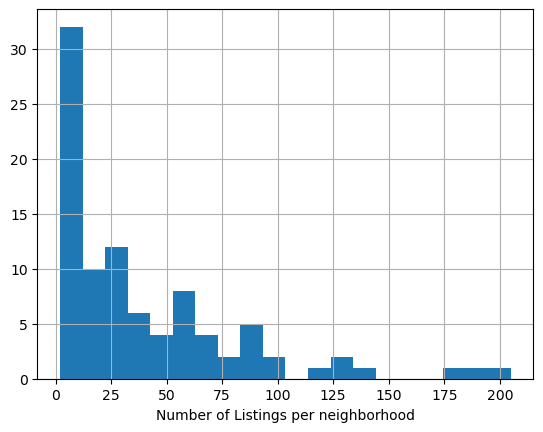

In [106]:
nb_summ.NB_listings_count.hist(bins=20)
plt.xlabel('Number of Listings per neighborhood')

I'd love to get a sense of listing density per neighborhood. Need Sq Miles of each neighborhood to do it, which would involve some web scraping (https://www.city-data.com/nbmaps/neigh-Portland-Oregon.html has more than I need, but has the answers to all of my questions). For the sake of expediency I'm going to keep working with my existing data, but it would be something to consider in future projects. 

#### What features correlate most strongly to price?

##### Scale for comparisons

In [107]:
nb_data_index = nb_summ.index
nb_data_columns = nb_summ.columns

nb_data_scale = scale(nb_summ)

In [108]:
nb_data_scaled_df=pd.DataFrame(nb_data_scale, columns=[nb_data_columns])
nb_data_scaled_df.head()

,NB_listings_count,NB_price_mean,NB_review_location_mean,NB_review_value_mean,NB_avail_30_mean,NB_avail_60_mean,NB_avail_90_mean,NB_avail_365_mean,NB_min_nights_low,NB_min_nights_high,NB_max_nights_low,NB_max_nights_high,NB_total_reviews,NB_review_rating_mean,NB_review_accuracy_mean,NB_review_cleanliness_mean,NB_review_checkin_mean,NB_review_communication_mean
0,-0.613502,0.023571,1.010248,0.181476,0.480986,0.025156,-0.294433,-0.720740,-0.147072,-0.244912,-0.216269,-0.104828,-0.558784,0.275784,0.590934,0.244283,0.345543,0.222727
1,0.336079,-0.438397,0.033339,-0.214134,-0.064703,-0.174986,-0.178565,0.180422,-0.147072,-0.244912,-0.283645,-0.104828,0.188196,-0.160530,0.000058,-0.007543,0.397170,0.263897
2,-0.891428,-0.227081,-0.630546,0.789904,3.516811,3.425852,3.236078,-1.756941,0.842976,-0.746445,4.432627,-0.104828,-0.735299,-0.954250,0.141277,-1.359304,0.642962,1.394874
3,-0.868267,-1.077355,-0.448236,0.415487,-0.894528,-0.159088,-0.005535,0.231898,-0.147072,-0.709294,-0.115206,-0.104828,-0.741051,0.658461,0.315338,-0.520505,0.642962,0.601421
4,-0.821946,-0.369707,1.101404,0.986473,-0.911495,-1.190851,-1.438982,-0.961406,-0.147072,-0.300637,-0.186793,-0.104828,-0.547444,1.161408,0.698272,1.393932,0.500201,0.139775


In [109]:
nb_data_scaled_df.mean()

#Should all be close to 0

NB_listings_count              -3.861645e-17
NB_price_mean                   1.215815e-16
NB_review_location_mean        -1.583878e-15
NB_review_value_mean           -1.546649e-14
NB_avail_30_mean                6.395850e-17
NB_avail_60_mean               -9.967872e-16
NB_avail_90_mean                1.508455e-16
NB_avail_365_mean               2.160108e-16
NB_min_nights_low              -1.387779e-17
NB_min_nights_high              8.688702e-17
NB_max_nights_low               4.827057e-18
NB_max_nights_high             -2.715219e-18
NB_total_reviews                4.042660e-17
NB_review_rating_mean          -8.387086e-15
NB_review_accuracy_mean         1.076162e-14
NB_review_cleanliness_mean      1.830360e-14
NB_review_checkin_mean         -8.616296e-15
NB_review_communication_mean    3.984132e-15
dtype: float64

In [110]:
nb_data_scaled_df.std()

#Should all be close to 1

NB_listings_count               1.005479
NB_price_mean                   1.005479
NB_review_location_mean         1.005479
NB_review_value_mean            1.005479
NB_avail_30_mean                1.005479
NB_avail_60_mean                1.005479
NB_avail_90_mean                1.005479
NB_avail_365_mean               1.005479
NB_min_nights_low               1.005479
NB_min_nights_high              1.005479
NB_max_nights_low               1.005479
NB_max_nights_high              1.005479
NB_total_reviews                1.005479
NB_review_rating_mean           1.005479
NB_review_accuracy_mean         1.005479
NB_review_cleanliness_mean      1.005479
NB_review_checkin_mean          1.005479
NB_review_communication_mean    1.005479
dtype: float64

In [111]:
nb_data_scaled_df.std(ddof=0)

NB_listings_count               1.0
NB_price_mean                   1.0
NB_review_location_mean         1.0
NB_review_value_mean            1.0
NB_avail_30_mean                1.0
NB_avail_60_mean                1.0
NB_avail_90_mean                1.0
NB_avail_365_mean               1.0
NB_min_nights_low               1.0
NB_min_nights_high              1.0
NB_max_nights_low               1.0
NB_max_nights_high              1.0
NB_total_reviews                1.0
NB_review_rating_mean           1.0
NB_review_accuracy_mean         1.0
NB_review_cleanliness_mean      1.0
NB_review_checkin_mean          1.0
NB_review_communication_mean    1.0
dtype: float64

#### Calculate PCA

In [112]:
nb_pca = PCA().fit(nb_data_scale)

In [113]:
nb_data_scale.shape

(92, 18)

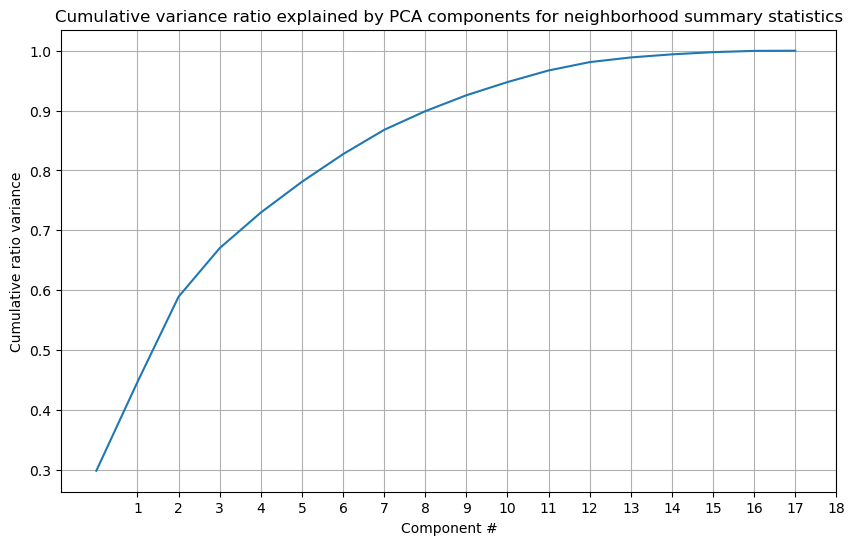

In [114]:
plt.subplots(figsize=(10, 6))
plt.plot(nb_pca.explained_variance_ratio_.cumsum())
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.grid()
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for neighborhood summary statistics');


In [115]:
nb_pca_x.shape

(92, 18)

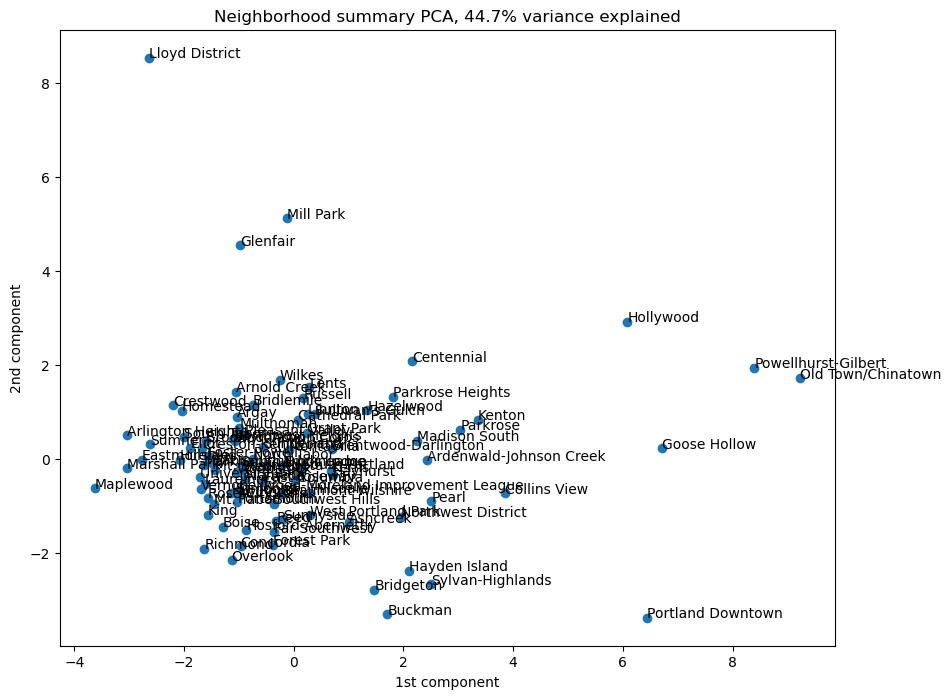

In [116]:
x = nb_pca_x[:, 0]
y = nb_pca_x[:, 1]
nb = nb_data_index
pc_var = 100 * nb_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title(f'Neighborhood summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(nb, x, y):
    plt.annotate(s, (x, y))

In [117]:
nb_avg_price = pdx.groupby('neighborhood')['price'].mean()
nb_avg_price.head()

neighborhood
Alameda                    138.846154
Arbor Lodge                 96.739130
Ardenwald-Johnson Creek    116.000000
Argay                       38.500000
Arlington Heights          103.000000
Name: price, dtype: float64

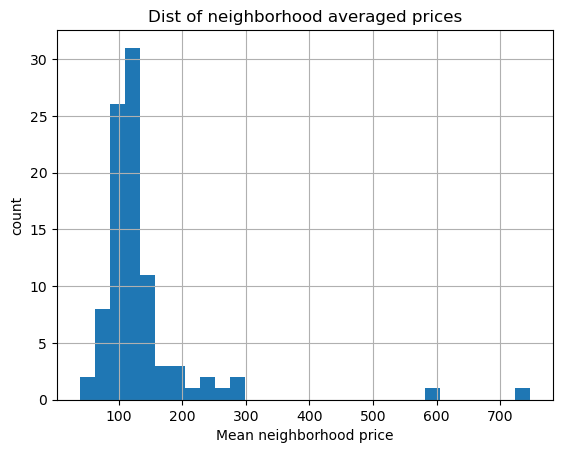

In [118]:
nb_avg_price.hist(bins=30)
plt.title('Dist of neighborhood averaged prices')
plt.xlabel('Mean neighborhood price')
plt.ylabel('count');

In [119]:
pca_df = pd.DataFrame({'PC1': nb_pca_x[:,0], 'PC2': nb_pca_x[:, 1]}, index=nb_data_index)
pca_df.head()

,PC1,PC2
neighborhood,,
Alameda,-0.885981,-0.420588
Arbor Lodge,-0.215567,-0.131800
Ardenwald-Johnson Creek,2.426597,-0.019083
Argay,-1.034776,0.903361
Arlington Heights,-3.048120,0.510868


In [120]:
nb_avg_price.to_frame().head()

,price
neighborhood,
Alameda,138.846154
Arbor Lodge,96.739130
Ardenwald-Johnson Creek,116.000000
Argay,38.500000
Arlington Heights,103.000000


In [121]:
pca_df = pd.concat([pca_df, nb_avg_price], axis=1)
pca_df.head()

,PC1,PC2,price
neighborhood,,,
Alameda,-0.885981,-0.420588,138.846154
Arbor Lodge,-0.215567,-0.131800,96.739130
Ardenwald-Johnson Creek,2.426597,-0.019083,116.000000
Argay,-1.034776,0.903361,38.500000
Arlington Heights,-3.048120,0.510868,103.000000


In [122]:
pca_df['Quartile'] = pd.qcut(pca_df.price, q=4, precision=1)
pca_df.head()

,PC1,PC2,price,Quartile
neighborhood,,,,
Alameda,-0.885981,-0.420588,138.846154,"(135.5, 747.6]"
Arbor Lodge,-0.215567,-0.131800,96.739130,"(38.4, 102.1]"
Ardenwald-Johnson Creek,2.426597,-0.019083,116.000000,"(102.1, 116.2]"
Argay,-1.034776,0.903361,38.500000,"(38.4, 102.1]"
Arlington Heights,-3.048120,0.510868,103.000000,"(102.1, 116.2]"


In [123]:
pca_df[pca_df.isnull().any(axis=1)]

#sanity check

,PC1,PC2,price,Quartile
neighborhood,,,,


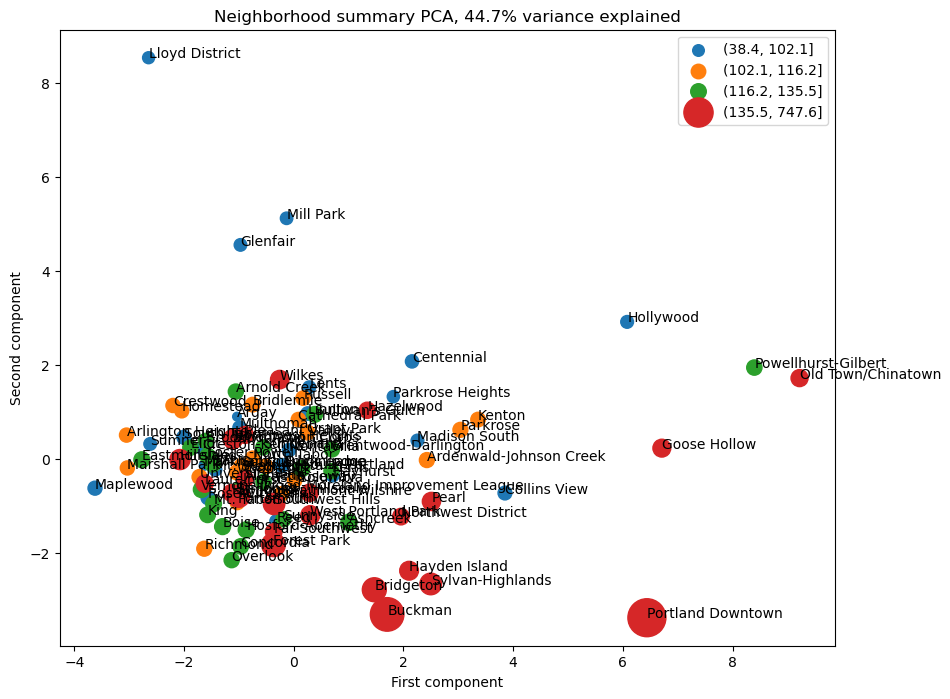

In [124]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.price
quartiles = pca_df.Quartile
nb = pca_df.index
pc_var = 100 * nb_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Neighborhood summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(nb, x, y):
    plt.annotate(s, (x, y))


#### Feature Engineering

In [125]:
pdx_data=pdx.merge(nb_summ, how='left', on='neighborhood')
pdx_data.head().T

,0,1,2,3,4
id,623976768455730606,7650094,43930130,640328648437453436,802905386849951102
listing_url,https://www.airbnb.com/rooms/623976768455730606,https://www.airbnb.com/rooms/7650094,https://www.airbnb.com/rooms/43930130,https://www.airbnb.com/rooms/640328648437453436,https://www.airbnb.com/rooms/802905386849951102
scrape_id,20231220035904,20231220035904,20231220035904,20231220035904,20231220035904
last_scraped,2023-12-20,2023-12-20,2023-12-20,2023-12-20,2023-12-20
source,city scrape,city scrape,city scrape,city scrape,previous scrape
...,...,...,...,...,...
NB_review_rating_mean,4.900692,4.809887,4.867295,4.872184,4.799123
NB_review_accuracy_mean,4.922462,4.842994,4.903361,4.891839,4.859649
NB_review_cleanliness_mean,4.898769,4.799153,4.873279,4.904023,4.831579
NB_review_checkin_mean,4.952231,4.891582,4.954918,4.969195,4.868421


In [126]:
pdx_data.dtypes

id                                int64
listing_url                      object
scrape_id                         int64
last_scraped                     object
source                           object
                                 ...   
NB_review_rating_mean           float64
NB_review_accuracy_mean         float64
NB_review_cleanliness_mean      float64
NB_review_checkin_mean          float64
NB_review_communication_mean    float64
Length: 92, dtype: object

In [127]:
pdx_data_numeric = pdx_data.select_dtypes('number')

In [128]:
pdx_data_numeric.head()

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,NB_min_nights_low,NB_min_nights_high,NB_max_nights_low,NB_max_nights_high,NB_total_reviews,NB_review_rating_mean,NB_review_accuracy_mean,NB_review_cleanliness_mean,NB_review_checkin_mean,NB_review_communication_mean
0,623976768455730606,20231220035904,NaN,4812174,2,2,NaN,45.568562,-122.625676,2,...,1,90,1,1125,20351,4.900692,4.922462,4.898769,4.952231,4.949923
1,7650094,20231220035904,NaN,1197719,2,3,NaN,45.524460,-122.688760,2,...,1,60,3,1125,19013,4.809887,4.842994,4.799153,4.891582,4.911695
2,43930130,20231220035904,NaN,81209824,3,3,NaN,45.554330,-122.661180,8,...,1,360,7,1125,18831,4.867295,4.903361,4.873279,4.954918,4.945328
3,640328648437453436,20231220035904,NaN,384749573,1,1,NaN,45.478098,-122.648011,2,...,1,31,2,1125,11934,4.872184,4.891839,4.904023,4.969195,4.957126
4,802905386849951102,20231220035904,NaN,174792040,2637,8868,NaN,45.518945,-122.681192,2,...,1,92,1,1125,2766,4.799123,4.859649,4.831579,4.868421,4.838246


In [129]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=1.25)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'price', data=pdx_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [130]:
features = [f for f in pdx_data_numeric.columns if f not in ['price']]

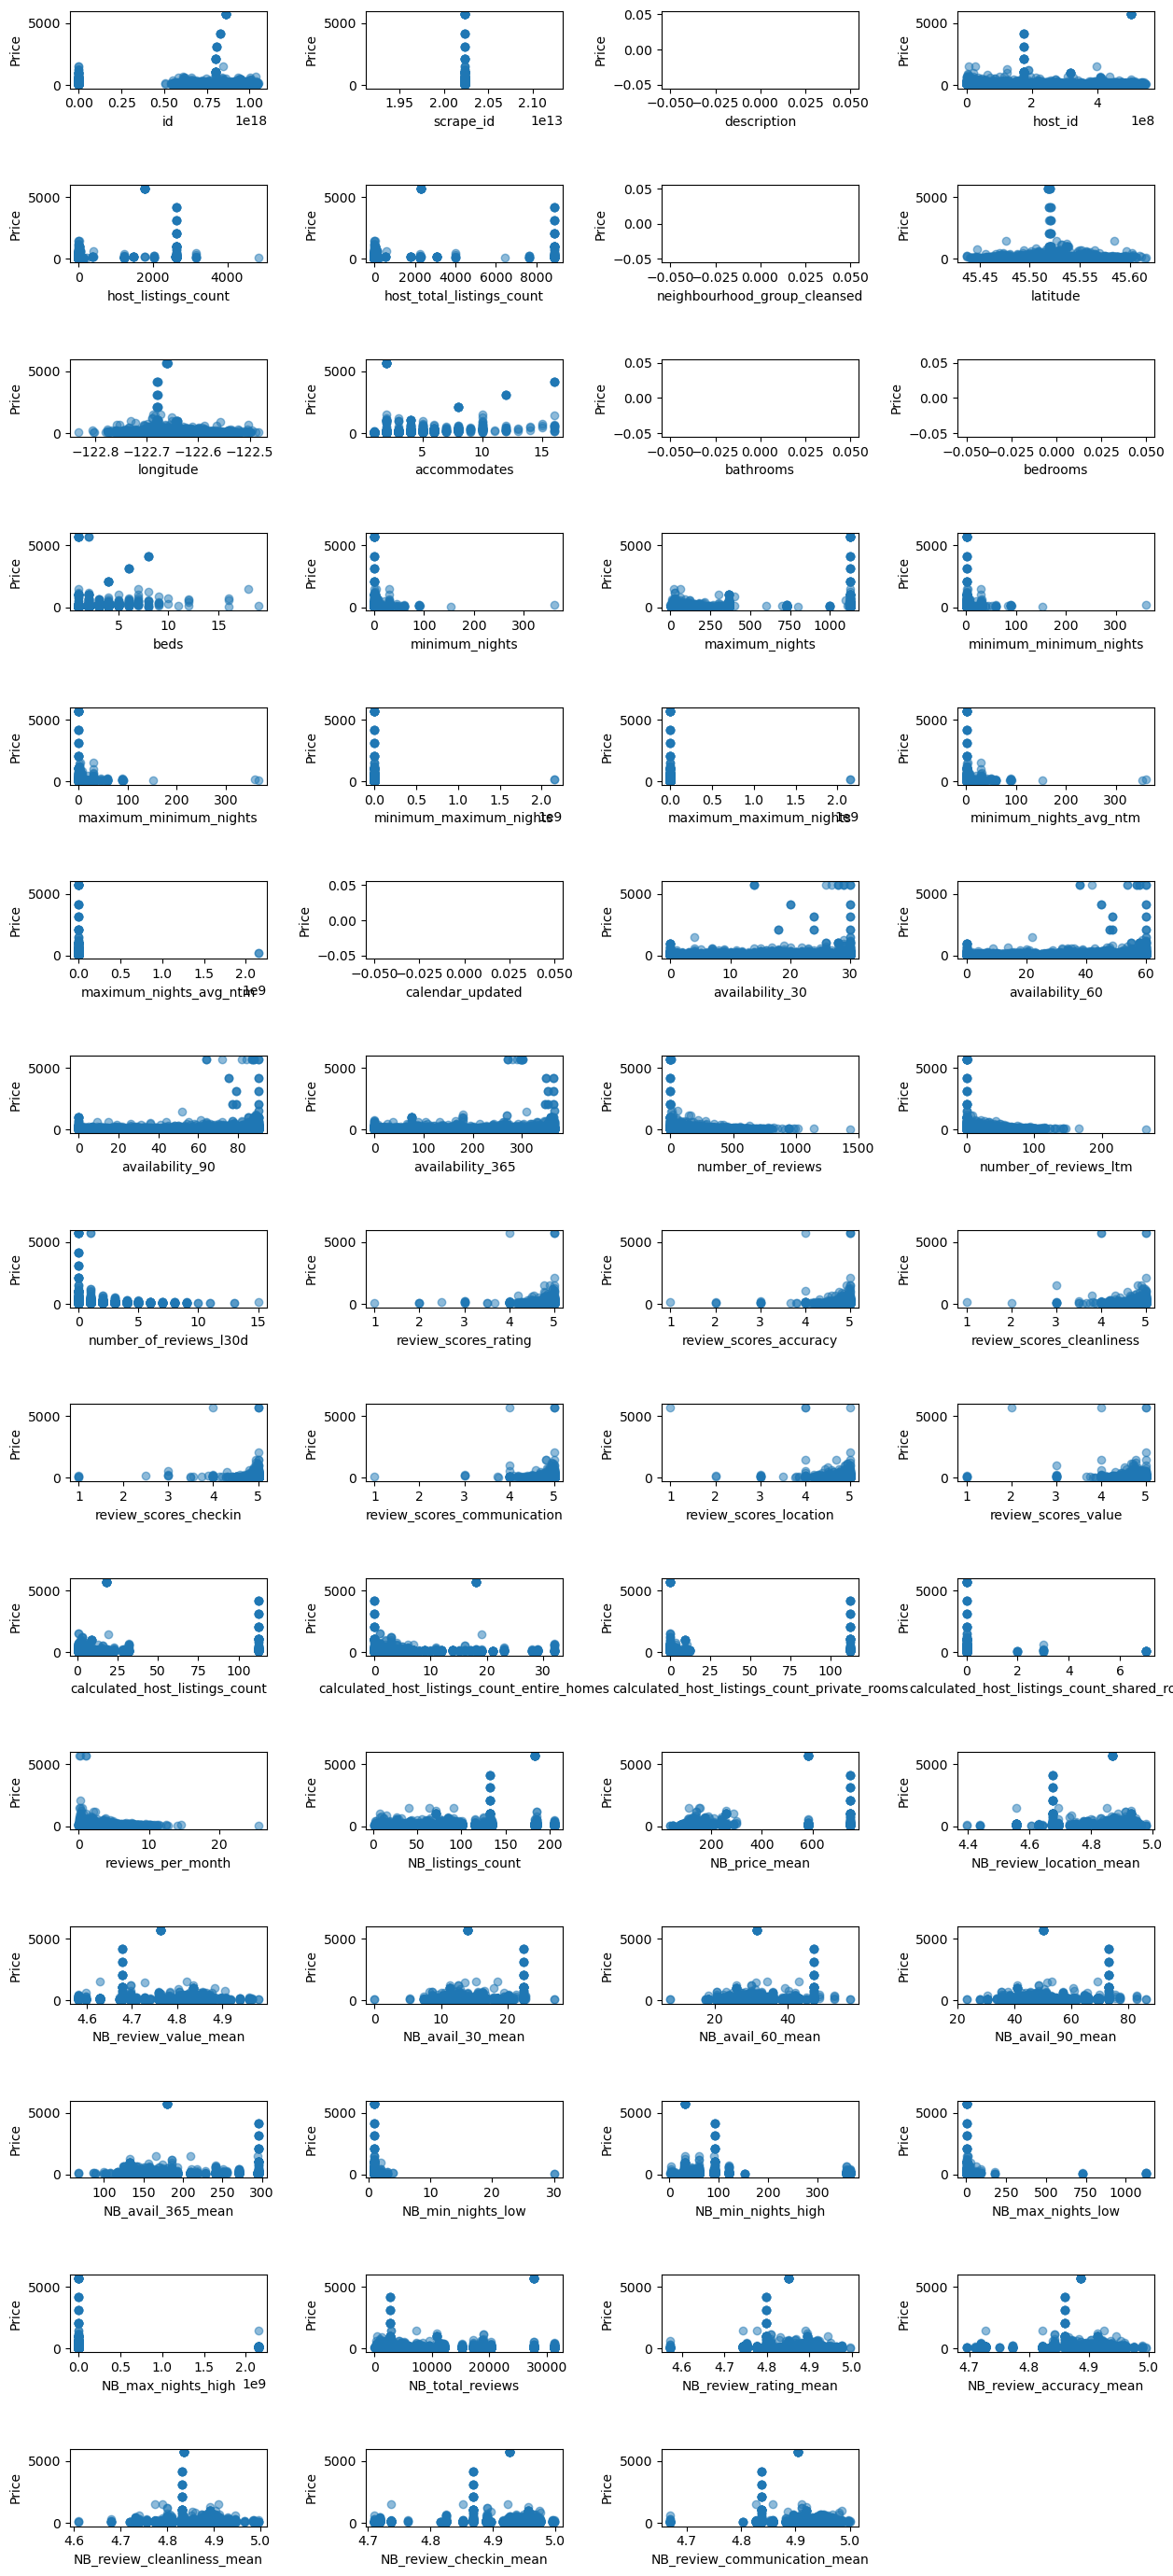

In [131]:
scatterplots(features, ncol=4, figsize=(15, 35))

From this is looks like the categories with the strongest correlation to price are minimum number of nights and review scores. 

### Summary

Numerical Features to explore look to be minimum number of nights and review scores (and their sub-categories - rating, cleanliness, communication, etc). <br><br>Categorical features look to be Neighborhood. There may be some further relationships to explore between beds and Neighborhood (from data wrangling notebook). 